In [1]:
import numpy as np


def compute_Sg(S, angles=(0,0,0)):
    
    alpha, beta, gamma = np.radians(angles)
    
    Rg = np.array([[np.cos(alpha) * np.cos(beta),  
                    np.sin(alpha) * np.cos(beta),  
                    -np.sin(beta)],
                   [np.cos(alpha) * np.sin(beta) * np.sin(gamma) - np.sin(alpha) * np.cos(gamma), 
                    np.sin(alpha) * np.sin(beta) * np.sin(gamma) + np.cos(alpha) * np.cos(gamma),  
                    np.cos(beta) * np.sin(gamma)],
                   [np.cos(alpha) * np.sin(beta) * np.cos(gamma) + np.sin(alpha) * np.sin(gamma), 
                    np.sin(alpha) * np.sin(beta) * np.cos(gamma) - np.cos(alpha) * np.sin(gamma),  
                    np.cos(beta) * np.cos(gamma)]])
                  
    return np.dot(Rg.T, np.dot(S,Rg))


def compute_Sb(S, angles_G=(0,0,0), angles_B=(0,0)):
    
    delta, phi = np.radians(angles_B)
    
    Rb = np.array([[ np.cos(delta) * np.cos(phi),  np.sin(delta) * np.cos(phi), np.sin(phi)],
                   [ np.sin(delta), np.cos(delta),  0.0],
                   [ np.cos(delta) * np.sin(phi), np.sin(delta) * np.sin(phi), np.cos(phi)]])
    
    Sg = compute_Sg(S, angles_G)
    
    return np.dot(Rb, np.dot(Sg,Rb.T))


def compute_wellbore_stress(Sb_eff, nu, theta, DP):
    
    theta = np.radians(theta)
    
    sZZ = (S[2,2] -  2. * nu * (S[0,0] - S[1,1]) * np.cos(2 * theta) - 
           4. * nu * S[0,1] * np.sin(2 * theta))
    
    stt = (S[0,0] + S[1,1] - 2. * (S[0,0] - S[1,1]) * np.cos(2 * theta) - 
           4 * S[0,1] * np.sin(2. * theta) - DP)
    
    ttz = 2. * (S[1,2] * np.cos(theta) - S[0,2] * np.sin(theta))
    
    srr = DP
    
    return (sZZ, stt, ttz, srr)


def compute_max_tangent_stress(Sb_eff, nu, theta, DP):
    
    sZZ, stt, ttz, srr = compute_wellbore_stress(Sb_eff, nu, theta, DP)
    
    return 0.5 * (sZZ + stt + np.sqrt((sZZ - stt) ** 2. + 4.0 * ttz ** 2.))


def compute_min_tangent_stress(Sb_eff, nu, theta, DP):
    
    sZZ, stt, ttz, srr = compute_wellbore_stress(Sb_eff, nu, theta, DP)
    
    return 0.5 * (sZZ + stt - np.sqrt((sZZ - stt) ** 2. + 4.0 * ttz ** 2.))

In [2]:
S = np.array([[30, 0, 0],[0,25,0],[0,0,20]])

Sb = compute_Sb(S, angles_G=(90,0,0), angles_B=(20,20))

In [3]:
Sb

array([[ 24.931581  ,  16.61062627,  14.65070088],
       [ 16.61062627,  29.41511111,   6.04577354],
       [ 14.65070088,   6.04577354,  20.6533079 ]])

In [4]:
Sb_eff = S - 20 * np.eye(3)

In [5]:
smin = compute_min_tangent_stress(Sb_eff, 0.2, 0.0, 20)

In [6]:
smin

18.0

In [7]:
smax = compute_max_tangent_stress(Sb_eff, 0.2, 0.0, 20)

In [8]:
smax

25.0

In [9]:
theta = np.linspace(0,360,num=100)

In [10]:
smax = np.array([ compute_max_tangent_stress(Sb_eff, 0.2, i, 20) for i in theta])

In [11]:
smax

array([ 25.        ,  25.08045187,  25.32051299,  25.71632067,
        26.26150623,  26.94729742,  27.76265962,  28.69447333,
        29.72774532,  30.84584987,  32.03079625,  33.26351822,
        34.52418084,  35.79249957,  37.04806668,  38.27067963,
        39.44066613,  40.53920064,  41.54860734,  42.4526445 ,
        43.23676581,  43.88835449,  44.39692621,  44.75429787,
        44.95471923,  44.99496542,  44.87438889,  44.59492974,
        44.16108457,  43.57983413,  42.86053095,  42.01474888,
        41.05609687,  40.        ,  38.86345126,  37.66473814,
        36.42314838,  35.15865964,  33.891618  ,  32.64241064,
        31.43113778,  30.27728925,  29.1994309 ,  28.21490588,
        27.33955557,  26.58746467,  25.97073462,  25.49928882,
        25.18071303,  25.02013324,  25.02013324,  25.18071303,
        25.49928882,  25.97073462,  26.58746467,  27.33955557,
        28.21490588,  29.1994309 ,  30.27728925,  31.43113778,
        32.64241064,  33.891618  ,  35.15865964,  36.42

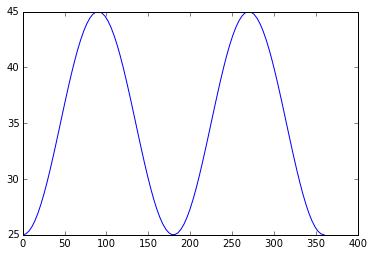

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(theta, smax)